# CosineEmbeddingLoss 余弦相似度损失

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

$$
\cos (\mathbf{x}, \mathbf{y})=\frac{\mathbf{x} \cdot \mathbf{y}}{\|\mathbf{x}\|_2 \times\|\mathbf{y}\|_2}=\frac{\sum_{i=1}^d x_i y_i}{\sqrt{\sum_{i=1}^d x_i^2 \times \sqrt{\sum_{i=1}^d y_i^2}}}
$$
x·y表示内积

### CosineEmbeddingLoss 介绍
- 输入是两个向量 $x_1, x_2$ 和标签 $y \in\{1,-1\}$
- $y=1$ 表示 $x_1$ 和 $x_2$ 是＂相似＂的，想让它们余弦相似度接近 1
- $y=-1$ 表示＂不相似＂，想让余弦相似度远离 1 ，距离大于 margin

损失计算公式：

$$
L\left(x_1, x_2, y\right)= \begin{cases}1-\cos \left(x_1, x_2\right), & \text { if } y=1 \\ \max \left(0, \cos \left(x_1, x_2\right)-\text { margin }\right), & \text { if } y=-1\end{cases}
$$


In [2]:
loss_fn = nn.CosineEmbeddingLoss(margin=0.5)  # margin 可调，默认是 0

# 构造样本向量，batch_size=3，embedding_dim=5
x1 = torch.tensor([
    [1., 0., 0., 0., 0.],
    [0., 1., 0., 0., 0.],
    [1., 1., 0., 0., 0.]
])
x2 = torch.tensor([
    [1., 0., 0., 0., 0.],  # 相似
    [1., 0., 0., 0., 0.],  # 不相似
    [0., 1., 0., 0., 0.]   # 不相似
])

# 标签：第一个样本是相似，后两个是不相似
y = torch.tensor([1, -1, -1], dtype=torch.float)

loss = loss_fn(x1, x2, y)
print("CosineEmbeddingLoss:", loss.item())


CosineEmbeddingLoss: 0.0690355896949768


In [3]:
# 逐样本计算余弦相似度和loss
cos_sim = nn.functional.cosine_similarity(x1, x2)
print("Cosine Similarities:", cos_sim)

loss_per_sample = torch.where(
    y == 1,
    1 - cos_sim,
    torch.clamp(cos_sim - 0.5, min=0)
)
print("Loss per sample:", loss_per_sample)
print("Mean Loss:", loss_per_sample.mean())


Cosine Similarities: tensor([1.0000, 0.0000, 0.7071])
Loss per sample: tensor([0.0000, 0.0000, 0.2071])
Mean Loss: tensor(0.0690)


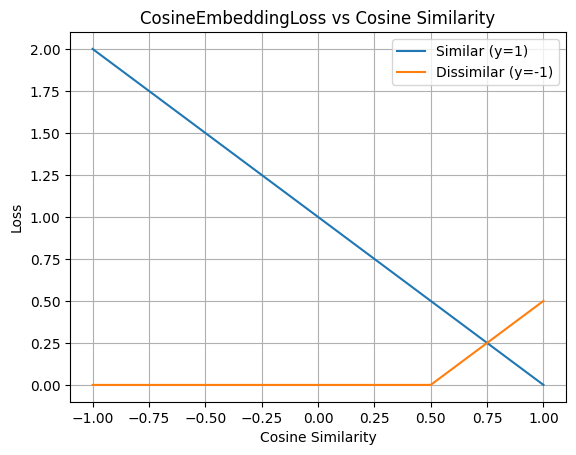

In [4]:
import numpy as np

cos_sim_range = torch.linspace(-1, 1, 300)
margin = 0.5

# y=1时 loss
loss_sim = 1 - cos_sim_range

# y=-1时 loss
loss_dissim = torch.clamp(cos_sim_range - margin, min=0)

plt.plot(cos_sim_range.numpy(), loss_sim.numpy(), label="Similar (y=1)")
plt.plot(cos_sim_range.numpy(), loss_dissim.numpy(), label="Dissimilar (y=-1)")
plt.title("CosineEmbeddingLoss vs Cosine Similarity")
plt.xlabel("Cosine Similarity")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()
